<a href="https://colab.research.google.com/github/saurabhraut02/ML_Repo/blob/Lab-04/LAB_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB 04**

# **SVM – Classification:**





Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing dataset

In [2]:
dataset = pd.read_csv('parkinsons_new.csv')

Pre-Processing & EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   age               195 non-null    int64  
 2   sex               195 non-null    object 
 3   MDVP:Fo(Hz)       195 non-null    float64
 4   MDVP:Fhi(Hz)      195 non-null    float64
 5   MDVP:Flo(Hz)      195 non-null    float64
 6   MDVP:Jitter(%)    195 non-null    float64
 7   MDVP:Jitter(Abs)  195 non-null    float64
 8   MDVP:RAP          195 non-null    float64
 9   MDVP:PPQ          195 non-null    float64
 10  Jitter:DDP        195 non-null    float64
 11  MDVP:Shimmer      195 non-null    float64
 12  MDVP:Shimmer(dB)  195 non-null    float64
 13  Shimmer:APQ3      195 non-null    float64
 14  Shimmer:APQ5      195 non-null    float64
 15  MDVP:APQ          195 non-null    float64
 16  Shimmer:DDA       195 non-null    float64
 1

<Axes: >

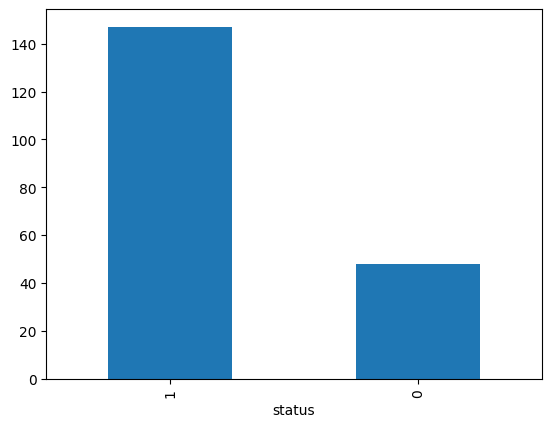

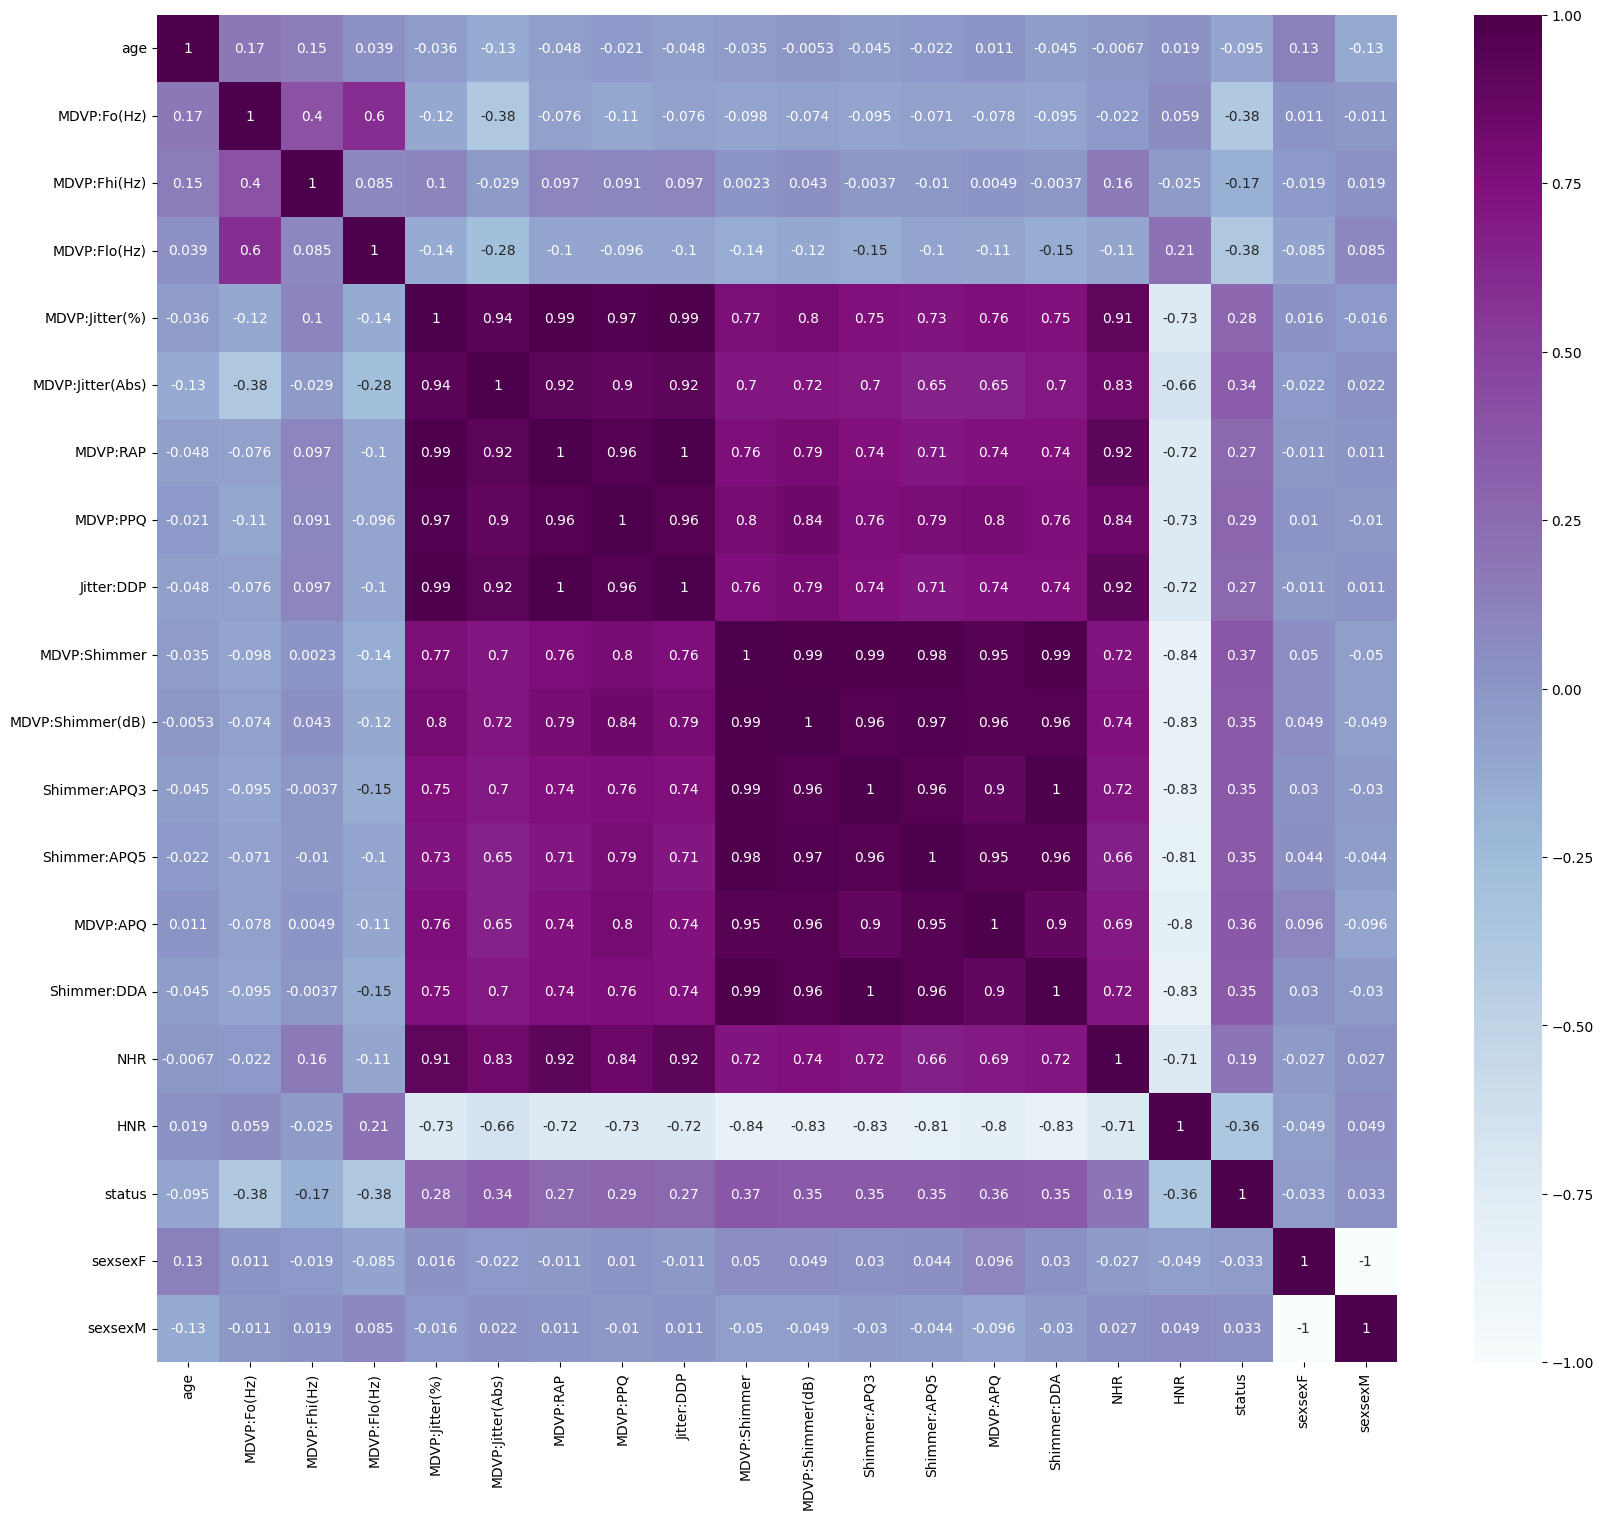

In [3]:
dataset.head()
dataset.tail()
dataset.shape
dataset.columns
dataset.info()
dataset.describe()
pd.isnull(dataset).sum()
classes = dataset['status'].value_counts()
classes
classes.plot.bar()
#droping a particular column, axis =1
dataset = dataset.drop(['name'], axis=1)
dataset = pd.get_dummies(dataset, prefix_sep='sex')
dataset.head()
#finding correlation between the features
corr_var=dataset.corr()
print(corr_var)
plt.figure(figsize=(20,17.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu')

In [4]:
X = dataset.loc[:, dataset.columns !="status"]
y = dataset["status"]

Train-Test split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =0)
print ("Dimention for X train:", X_train.shape)
print ("Dimention for X test:", X_test.shape)
print ("Dimention for y train:", y_train.shape)
print ("Dimention for y test:", y_test.shape)

Dimention for X train: (156, 19)
Dimention for X test: (39, 19)
Dimention for y train: (156,)
Dimention for y test: (39,)


Standardization of Data

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


Classification SVM

Linear

In [7]:
from sklearn import svm
cl = svm.SVC(kernel='linear', C=0.01)
cl.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

In [8]:
y_pred = cl.predict(X_train)

In [9]:
y_pred_1 = cl.predict(X_test)
y_pred_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Models Performance

In [10]:

from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)
cm

array([[ 0, 10],
       [ 0, 29]])

In [11]:
acc = accuracy_score(y_test, y_pred_1)
acc

0.7435897435897436

Grid Search

In [12]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000],
              'degree': [2, 3, 4, 5],
              'gamma':[0.001, 0.01, 0.1, 0.5, 1],
              'kernel': ['rbf','poly']
              }
cl = svm.SVC()
grid = GridSearchCV(cl, parameters, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 5, 'degree': 4, 'gamma': 0.1, 'kernel': 'poly'}
SVC(C=5, degree=4, gamma=0.1, kernel='poly')


In [13]:
from sklearn.metrics import classification_report
grid_prediction = grid.predict(X_test)
print(classification_report(y_test, grid_prediction))


              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39



# **SVM – Regression:**

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
dataset = pd.read_csv('Position_Salaries.csv')

In [32]:
dataset.head()
dataset.tail()
dataset.columns
dataset.shape
dataset.describe()
print(str('Any missing data or NaN in the dataset:'),dataset.isnull().values.any())
dataset.info()

Any missing data or NaN in the dataset: False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [33]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [34]:
y = y.reshape(-1, 1)

In [35]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [36]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [37]:
y_pred = regressor.predict(scaled_input)
y_pred = y_pred.reshape(-1, 1)  # Reshape to a 2D array
y_pred = sc_y.inverse_transform(y_pred)
print(y_pred)

[[252789.13921624]]


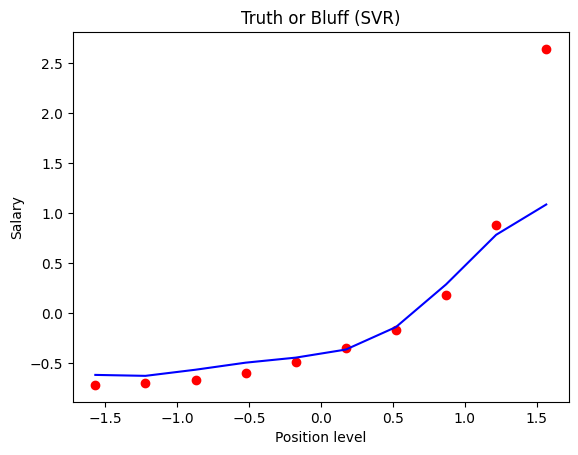

In [38]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


<ipython-input-39-abe09048e5b5>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.


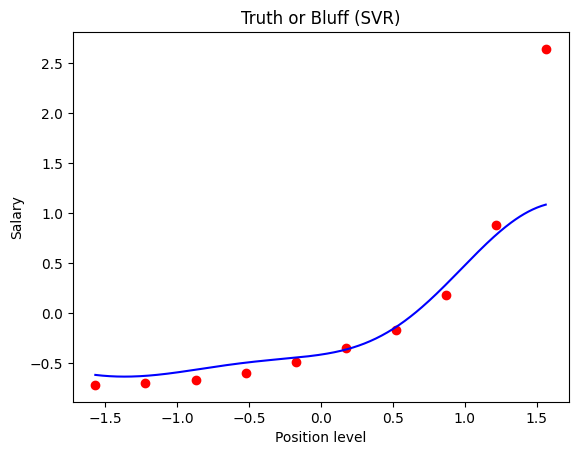

In [39]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
